# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import SeparableConv2D
from keras import optimizers


from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


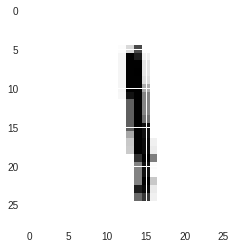

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[8])
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(Convolution2D(32, (3, 3),activation='relu'))
model.add(SeparableConv2D(32, (3, 3),depth_multiplier=1,activation='relu'))
model.add(SeparableConv2D(32, (3, 3),depth_multiplier=1,activation='relu'))
model.add(SeparableConv2D(32, (3, 3),depth_multiplier=2,activation='relu'))
model.add(SeparableConv2D(32, (3, 3),depth_multiplier=2,activation='relu'))
model.add(SeparableConv2D(32, (3, 3),depth_multiplier=2,activation='relu'))
model.add(MaxPooling2D(2))
model.add(SeparableConv2D(10, 6,activation='softmax'))
model.add(Flatten())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
separable_conv2d_127 (Separa (None, 20, 20, 32)        1344      
_________________________________________________________________
separable_conv2d_128 (Separa (None, 18, 18, 32)        1344      
_________________________________________________________________
separable_conv2d_129 (Separa (None, 16, 16, 32)        2656      
_________________________________________________________________
separable_conv2d_130 (Separa (None, 14, 14, 32)        2656      
__________

In [0]:
#adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=45, epochs=13, verbose=1)

Epoch 1/13
60000/60000 [==============================] - 37s 612us/step - loss: 0.2632 - acc: 0.9188
Epoch 2/13
60000/60000 [==============================] - 33s 542us/step - loss: 0.0773 - acc: 0.9766
Epoch 3/13
60000/60000 [==============================] - 32s 541us/step - loss: 0.0568 - acc: 0.9830
Epoch 4/13
60000/60000 [==============================] - 33s 544us/step - loss: 0.0473 - acc: 0.9858
Epoch 5/13
60000/60000 [==============================] - 33s 544us/step - loss: 0.0419 - acc: 0.9870
Epoch 6/13
60000/60000 [==============================] - 32s 541us/step - loss: 0.0374 - acc: 0.9887
Epoch 7/13
60000/60000 [==============================] - 32s 539us/step - loss: 0.0331 - acc: 0.9891
Epoch 8/13
60000/60000 [==============================] - 33s 542us/step - loss: 0.0304 - acc: 0.9907
Epoch 9/13
60000/60000 [==============================] - 32s 540us/step - loss: 0.0281 - acc: 0.9916
Epoch 10/13
60000/60000 [==============================] - 32s 541us/step - loss: 

In [0]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(test_acc,score)

0.9921 [0.027197462945811275, 0.9921]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.5100780e-09 7.6786790e-08 7.1615013e-06 1.9878096e-05 3.2309391e-11
  4.5120370e-09 7.3241907e-17 9.9996889e-01 2.2251553e-08 3.9580541e-06]
 [7.1881013e-06 8.4374933e-06 9.9990928e-01 1.3640045e-09 2.1015094e-07
  3.0884146e-11 7.1653689e-05 1.0059466e-11 3.2454789e-06 8.2157172e-12]
 [8.8451086e-09 9.9998331e-01 2.3735254e-06 1.5485839e-10 5.5952628e-06
  1.4838184e-07 3.0505120e-07 7.6967235e-06 3.5406205e-07 1.9133395e-07]
 [9.9878949e-01 4.9158373e-12 3.1107639e-08 5.6751279e-08 6.5897460e-08
  3.2182791e-06 1.1311729e-03 1.8974271e-08 6.2517662e-05 1.3404433e-05]
 [3.9344947e-10 5.0251466e-11 4.1295185e-09 3.1106964e-10 9.9509525e-01
  1.7632695e-07 1.8627736e-08 7.0555900e-10 4.4142132e-04 4.4631939e-03]
 [7.4181088e-08 9.9998379e-01 1.0406969e-05 4.7529610e-12 1.7288814e-06
  1.2172602e-08 1.3257747e-07 3.4264385e-06 2.0594601e-07 2.5025039e-07]
 [1.5766597e-13 8.1091537e-07 5.6025488e-07 4.1225981e-11 9.9697053e-01
  1.7108111e-06 6.6822624e-11 1.3346269e-06 2.3130274e-03 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

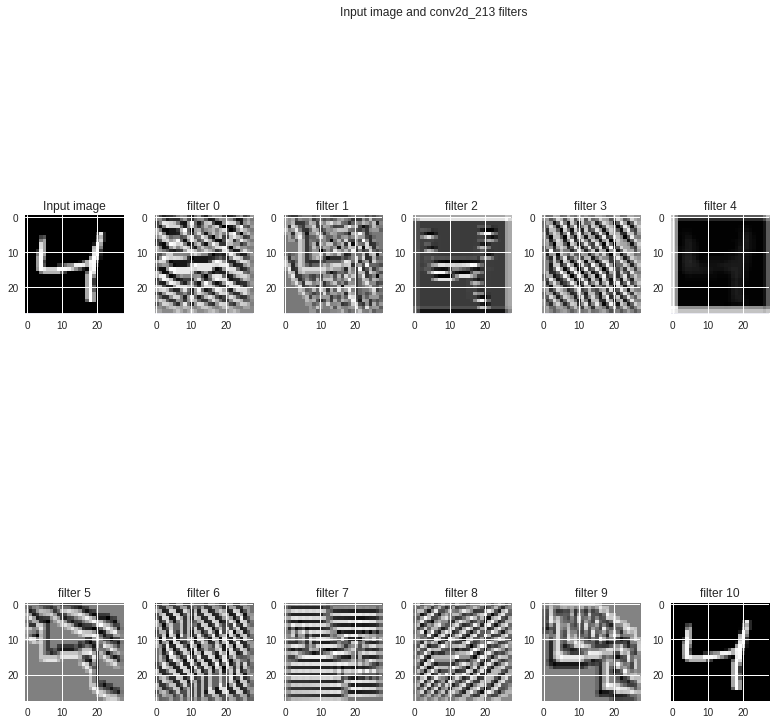

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_213'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()